# Assignment 2: Linear and logistic regression
### ip222gs

## Exercise 1: Multivariate regression

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read csv and save output as numpy array
df = np.loadtxt('GPUbenchmark.csv', delimiter=',')

In [4]:
df[:5]

array([[3584. , 1480. , 1582. ,   11. ,   11. ,  484. ,  158. ],
       [2560. , 1607. , 1733. ,   10. ,    8. ,  320. ,  126. ],
       [2048. , 1126. , 1216. ,    7. ,    4. ,  224. ,   76. ],
       [2816. , 1000. , 1075. ,    7. ,    6. ,  336.5,   98.7],
       [1920. , 1506. , 1683. ,    8. ,    8. ,  256. ,   98.9]])

In [5]:
# Split features and target arrays
X = df[:, :6]
y = df[:, 6].reshape(-1,1)

### Task 1. Start by normalizing X

In [6]:
# Apply Feature Normalization
column_mean = X.mean(axis=0)
column_std = X.std(axis=0)

In [7]:
X_norm = (X - column_mean)/ column_std

### Task 2. Plot data

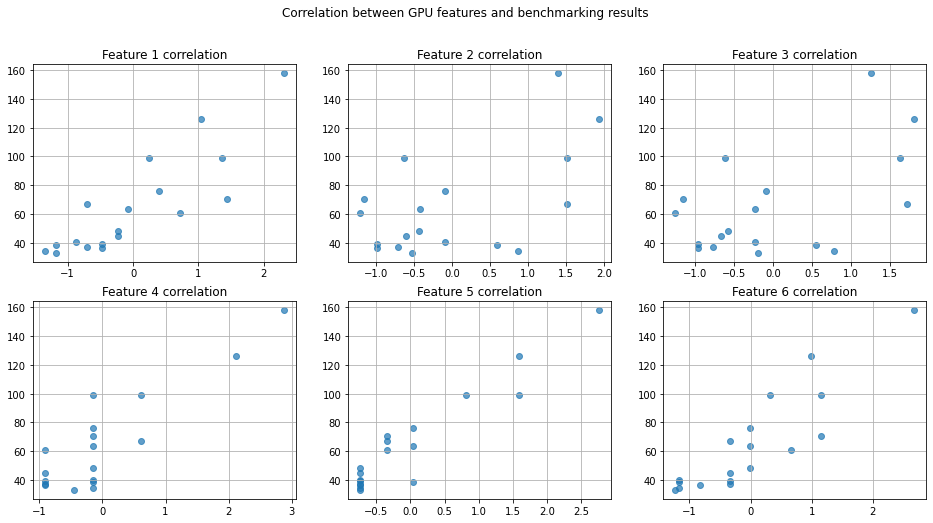

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
axs[0, 0].scatter(x=X_norm[:, 0], y=y, alpha=0.7)
axs[0, 0].set(title = 'Feature 1 correlation')
axs[0, 0].grid()
axs[0, 1].scatter(x=X_norm[:, 1], y=y, alpha=0.7)
axs[0, 1].set(title = 'Feature 2 correlation')
axs[0, 1].grid()
axs[0, 2].scatter(x=X_norm[:, 2], y=y, alpha=0.7)
axs[0, 2].set(title = 'Feature 3 correlation')
axs[0, 2].grid()
axs[1, 0].scatter(x=X_norm[:, 3], y=y, alpha=0.7)
axs[1, 0].set(title = 'Feature 4 correlation')
axs[1, 0].grid()
axs[1, 1].scatter(x=X_norm[:, 4], y=y, alpha=0.7)
axs[1, 1].set(title = 'Feature 5 correlation')
axs[1, 1].grid()
axs[1, 2].scatter(x=X_norm[:, 5], y=y, alpha=0.7)
axs[1, 2].set(title = 'Feature 6 correlation')
axs[1, 2].grid()
plt.suptitle("Correlation between GPU features and benchmarking results")
plt.show()

### Task 3. Compute beta using normal equation

In [9]:
# Compute the extended matrix Xe of normalized matrix
n = X_norm.shape[0]
Xe = np.c_[np.ones((n,1)),X_norm]

In [10]:
#Implement the Normal Equation
beta = np.linalg.inv((Xe.T).dot(Xe)).dot(Xe.T).dot(y)

In [11]:
beta

array([[65.18888889],
       [18.05577085],
       [-5.3521726 ],
       [13.04504442],
       [ 4.19572708],
       [10.04004069],
       [ 1.26250957]])

In [12]:
# Calculate predicted benchmark result for given feature values 2432; 1607; 1683; 8; 8; 256
X_test = np.array([2432, 1607, 1683, 8, 8, 256]).reshape(1,6)

#normalize features and calculate extended matrix
X_test_norm = (X_test - column_mean)/ column_std
Xe_test = np.c_[1,X_test_norm]

#Calculate benchmark
result = np.dot(Xe_test,beta)

print(f'predicted result is {round(result[0,0], 1)}')
print(f'actual result is 114.0')

predicted result is 110.8
actual result is 114.0


### Task 4. Calculate cost function

In [13]:
#Cost function:
j = np.dot(Xe,beta)-y
J = (j.T.dot(j))/n
print(f'Cost function for a beta computed by the normal equation is {J[0,0]}')

Cost function for a beta computed by the normal equation is 12.396444360915648


### Task 5a. Gradient descent Find hyperparameters (alfa, N) to get within 1% of the final cost for the normal equation

Cost function at learning rate of 0.025 and numer of iterations of 10000 is equal to 12.39644436091567
It is 1.72e-13 % difference from the cost function computed by the normal equation 


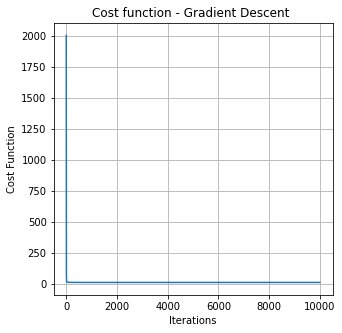

In [25]:
L = 0.025  # The learning Rate
iterations = 10000  # The number of iterations to perform gradient descent

beta_grad = np.zeros((7,1))
cost = np.zeros([iterations, 2])

n = X.shape[0]

# Performing Gradient Descent 
for i in range(iterations): 
    beta_grad = beta_grad - L*(Xe.T.dot(np.dot(Xe, beta_grad) - y))
    #Cost function:
    j = np.dot(Xe,beta_grad)-y
    J_grad = (j.T.dot(j))/n
    cost[i, :] = np.c_[J_grad, i]
print(f'Cost function at learning rate of {L} and numer of iterations of {iterations} is equal to {J_grad[0,0]}')
print(f'It is {round(np.abs((J[0,0]-J_grad[0,0]))/J[0,0]*100, 15)} % difference from the cost function computed by the normal equation ')

plt.figure(figsize=(5,5))
plt.plot(cost[:, 1], cost[:, 0])
plt.title('Cost function - Gradient Descent ')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.grid(True)

### Task 5b. What is the predicted benchmark result for the example graphic card with feature values of (2432, 1607, 1683, 8, 8, 256)

In [224]:
#Calculate benchmark using previously defined Extended matrix for provided features and beta from gradient decsent calculation
result_grad = np.dot(Xe_test,beta_grad)

print(f'Predicted benchmark result for features (2432, 1607, 1683, 8, 8, 256) using betas from Gradient descent is {round(result_grad[0,0], 1)}')

Predicted benchmark result for features (2432, 1607, 1683, 8, 8, 256) using betas from Gradient descent is 110.8
